In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL # Image libary in python 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True) # cache dir means save the data set in the same directory by . 
# untar means unzip it. 
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228827136/228813984 [==============================] - 1s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/daisy/3463313493_9497aa47e5_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/2454280137_e1637536ae_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/2481823240_eab0d86921.jpg'),
 PosixPath('datasets/flower_photos/daisy/10993710036_2033222c91.jpg'),
 PosixPath('datasets/flower_photos/daisy/16737503507_431768a927.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/4764674741_82b8f93359_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15184419268_7230e9728e.jpg'),
 PosixPath('datasets/flower_photos/roses/4325834819_ab56661dcc_m.jpg'),
 PosixPath('datasets/flower_photos/roses/9298314004_c1a8146521.jpg'),
 PosixPath('datasets/flower_photos/roses/7251352826_69b62cba2c_m.jpg')]

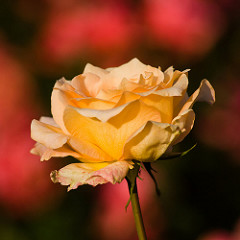

In [8]:
PIL.Image.open(str(roses[4]))

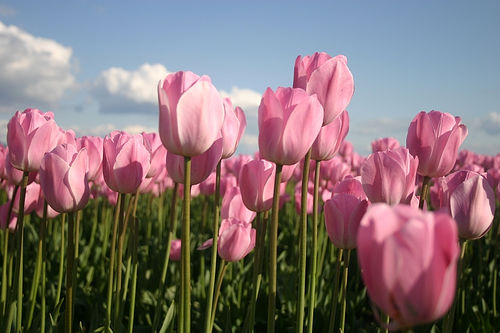

In [9]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [10]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [11]:
flowers_images_dict['daisy']

[PosixPath('datasets/flower_photos/daisy/3463313493_9497aa47e5_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/2454280137_e1637536ae_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/2481823240_eab0d86921.jpg'),
 PosixPath('datasets/flower_photos/daisy/10993710036_2033222c91.jpg'),
 PosixPath('datasets/flower_photos/daisy/16737503507_431768a927.jpg'),
 PosixPath('datasets/flower_photos/daisy/476857510_d2b30175de_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/5574421625_61b1f49b3f_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/2408024540_37f0be7cc0_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/5434901893_4550be3f84_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/11870378973_2ec1919f12.jpg'),
 PosixPath('datasets/flower_photos/daisy/14523675369_97c31d0b5b.jpg'),
 PosixPath('datasets/flower_photos/daisy/2351206867_084e57bd97.jpg'),
 PosixPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/2838487505_6c3b48efa5_m.jpg'),
 P

In [12]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [13]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/4764674741_82b8f93359_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15184419268_7230e9728e.jpg'),
 PosixPath('datasets/flower_photos/roses/4325834819_ab56661dcc_m.jpg'),
 PosixPath('datasets/flower_photos/roses/9298314004_c1a8146521.jpg'),
 PosixPath('datasets/flower_photos/roses/7251352826_69b62cba2c_m.jpg')]

In [14]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/4764674741_82b8f93359_n.jpg'

In [15]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img

array([[[ 5,  7,  7],
        [ 1,  3,  3],
        [ 0,  1,  1],
        ...,
        [ 4, 21,  8],
        [ 9, 27, 14],
        [ 8, 28, 15]],

       [[ 1,  3,  3],
        [ 0,  1,  1],
        [ 0,  0,  0],
        ...,
        [ 3, 17,  5],
        [ 4, 21,  8],
        [ 3, 21,  8]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 2, 13,  3],
        [ 0, 13,  2],
        [ 0, 13,  2]],

       ...,

       [[ 3, 25,  6],
        [ 0, 21,  3],
        [ 0, 24,  6],
        ...,
        [39, 89, 65],
        [44, 68, 44],
        [41, 59, 36]],

       [[ 0, 28,  8],
        [ 0, 25,  7],
        [ 1, 24,  9],
        ...,
        [34, 79, 60],
        [37, 56, 37],
        [33, 45, 27]],

       [[ 0, 30,  9],
        [ 1, 27,  9],
        [ 3, 24,  9],
        ...,
        [23, 66, 51],
        [25, 42, 28],
        [22, 32, 19]]], dtype=uint8)

In [16]:
img.shape

(240, 320, 3)

In [17]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [18]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
  print(flower_name)
  print(len(images))

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [19]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [20]:
y[:5]


[0, 0, 0, 0, 0]

In [21]:
X[0]

array([[[  3,   5,   5],
        [  0,   1,   1],
        [  0,   0,   0],
        ...,
        [  0,  11,   0],
        [  3,  19,   6],
        [  7,  26,  13]],

       [[  0,   1,   1],
        [  0,   0,   0],
        [  0,   1,   1],
        ...,
        [  2,  14,   2],
        [  2,  15,   4],
        [  2,  17,   5]],

       [[  0,   0,   0],
        [  1,   1,   1],
        [  2,   2,   2],
        ...,
        [  7,  16,   6],
        [  3,  13,   3],
        [  0,   9,   0]],

       ...,

       [[  4,  26,   7],
        [  1,  28,   9],
        [ 10,  41,  22],
        ...,
        [ 13, 113,  91],
        [ 35,  95,  70],
        [ 39,  66,  42]],

       [[  1,  25,   6],
        [  1,  25,   8],
        [  7,  29,  15],
        ...,
        [ 21, 116,  95],
        [ 35,  88,  66],
        [ 38,  56,  35]],

       [[  0,  28,   9],
        [  3,  23,   9],
        [  1,  15,   3],
        ...,
        [ 17, 109,  94],
        [ 23,  73,  57],
        [ 25,  38,  24]]

In [22]:
X = np.array(X)
y = np.array(y)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)  #Train test split

In [24]:
len(X_train)

2752

In [25]:
len(X_test)

918

In [26]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255 #Preprocessing: scale images

In [27]:
X_train_scaled[0]

array([[[0.15294118, 0.35686275, 0.32941176],
        [0.05490196, 0.4       , 0.34509804],
        [0.00392157, 0.40392157, 0.3372549 ],
        ...,
        [0.17254902, 0.34117647, 0.23921569],
        [0.16078431, 0.3372549 , 0.23529412],
        [0.16078431, 0.3372549 , 0.24705882]],

       [[0.18039216, 0.43921569, 0.40784314],
        [0.03529412, 0.41176471, 0.35686275],
        [0.        , 0.36862745, 0.30980392],
        ...,
        [0.16078431, 0.33333333, 0.22745098],
        [0.15686275, 0.32941176, 0.23529412],
        [0.14901961, 0.3254902 , 0.23529412]],

       [[0.08627451, 0.42352941, 0.38823529],
        [0.01960784, 0.42352941, 0.36470588],
        [0.00392157, 0.32941176, 0.27058824],
        ...,
        [0.14509804, 0.32156863, 0.22352941],
        [0.14509804, 0.32156863, 0.22745098],
        [0.1372549 , 0.31764706, 0.23137255]],

       ...,

       [[0.26666667, 0.43137255, 0.45098039],
        [0.30196078, 0.45882353, 0.47843137],
        [0.3254902 , 0

In [28]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)    

Epoch 1/10
86/86 [==============================] - 86s 985ms/step - loss: 1.3632 - accuracy: 0.4084
Epoch 2/10
86/86 [==============================] - 78s 910ms/step - loss: 0.9997 - accuracy: 0.6072
Epoch 3/10
86/86 [==============================] - 80s 927ms/step - loss: 0.8330 - accuracy: 0.6926
Epoch 4/10
86/86 [==============================] - 78s 912ms/step - loss: 0.6461 - accuracy: 0.7620
Epoch 5/10
86/86 [==============================] - 79s 914ms/step - loss: 0.4478 - accuracy: 0.8358
Epoch 6/10
86/86 [==============================] - 79s 916ms/step - loss: 0.2971 - accuracy: 0.8975
Epoch 7/10
86/86 [==============================] - 79s 916ms/step - loss: 0.1573 - accuracy: 0.9488
Epoch 8/10
86/86 [==============================] - 79s 915ms/step - loss: 0.1006 - accuracy: 0.9720
Epoch 9/10
86/86 [==============================] - 78s 912ms/step - loss: 0.0694 - accuracy: 0.9807
Epoch 10/10
86/86 [==============================] - 78s 912ms/step - loss: 0.0429 - accura

In [29]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 8s 259ms/step - loss: 2.1190 - accuracy: 0.6122


[2.1189777851104736, 0.6122004389762878]

In [30]:
predictions = model.predict(X_test_scaled)
predictions

array([[ 7.156686  ,  5.774883  , -4.410014  , -5.8567724 ,  5.96842   ],
       [16.884727  , -5.0194483 , -8.735248  ,  2.5283058 , 15.659552  ],
       [-1.3806989 ,  1.8643239 ,  6.1761947 , -5.996185  , -0.5337412 ],
       ...,
       [-0.07944794, -0.7333292 , -2.27517   ,  7.17733   ,  0.61776346],
       [ 3.6250944 , -0.11506312,  2.492922  ,  6.203324  ,  2.235262  ],
       [ 2.4871378 ,  0.5024723 ,  2.277005  , 10.104425  ,  1.0793464 ]],
      dtype=float32)

In [31]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([6.4272052e-01, 1.6140343e-01, 6.0907137e-06, 1.4333394e-06,
       1.9586864e-01], dtype=float32)>

In [32]:
np.argmax(np.array([0,78,123,8]))

2

In [33]:
np.argmax(score)

0

In [34]:
y_test[0]

1

In [ ]:
# Improve Test Accuracy Using Data Augmentation

In [35]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

NameError: ignored

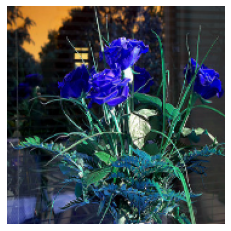

In [ ]:
plt.axis('off')
plt.imshow(X[0])

NameError: ignored

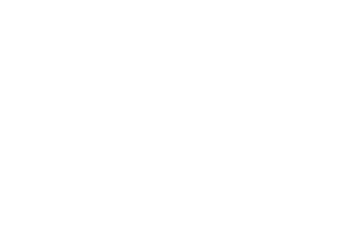

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))
# Newly generated training sample using data augmentation

In [ ]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)    

In [ ]:
model.evaluate(X_test_scaled,y_test)